In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

IMAGEPATH = '../slides/eods-06-machinelearningmodels_1/images/'
%matplotlib inline

In [2]:
from sklearn import datasets
wine = datasets.load_wine()
X = pd.DataFrame(wine.data,columns=wine.feature_names)
y = wine.target

# keep only class 0 and 1 and two columns of X and standardize X
features = wine.feature_names[3:5]
X = X.iloc[y < 2,3:5].apply(lambda x: (x-x.mean())/x.std()).values
y = y[y < 2]
X.shape,y.shape

((130, 2), (130,))

In [3]:
features

['alcalinity_of_ash', 'magnesium']

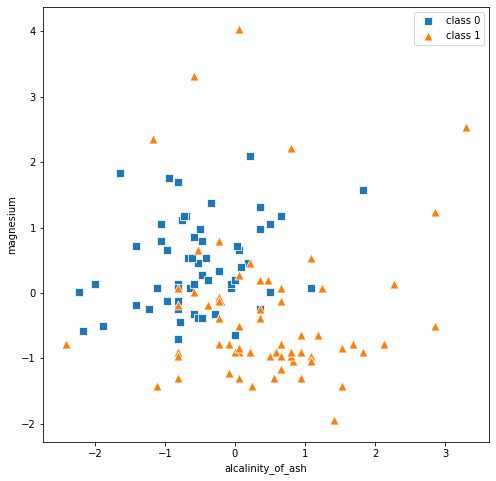

In [4]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
sns.scatterplot(X[y==0,0],X[y==0,1],label='class 0',marker='s',s=80);
sns.scatterplot(X[y==1,0],X[y==1,1],label='class 1',marker='^',s=80);
plt.xlabel(features[0]); plt.ylabel(features[1]);

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

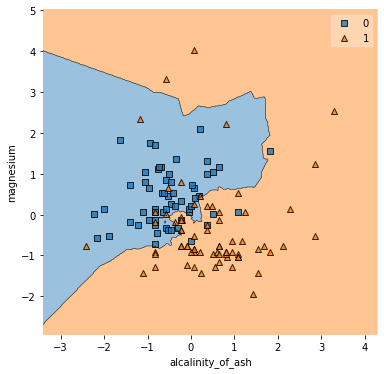

In [6]:
from mlxtend.plotting import plot_decision_regions
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=knn);
plt.xlabel(features[0]); plt.ylabel(features[1]);

In [7]:
## ROC plots from Week 5

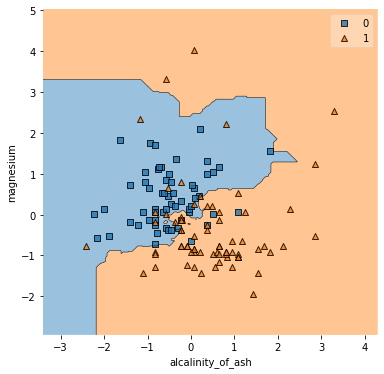

In [8]:
from mlxtend.plotting import plot_decision_regions
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=KNeighborsClassifier(metric='manhattan').fit(X,y));
plt.xlabel(features[0]); plt.ylabel(features[1]);

---

In [9]:
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

In [10]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


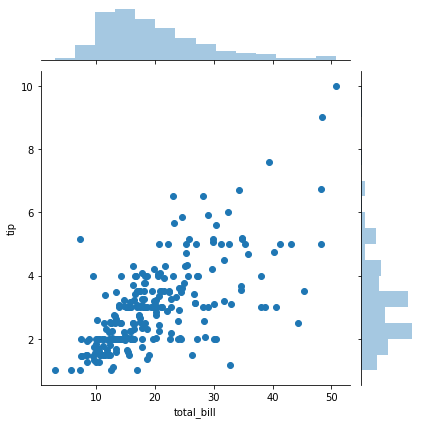

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips);

In [12]:
from scipy.stats import pearsonr
r,p = pearsonr(tips.total_bill,tips.tip)
print(f'r: {r:.2f}, p: {p:.2f}')

r: 0.68, p: 0.00


In [13]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


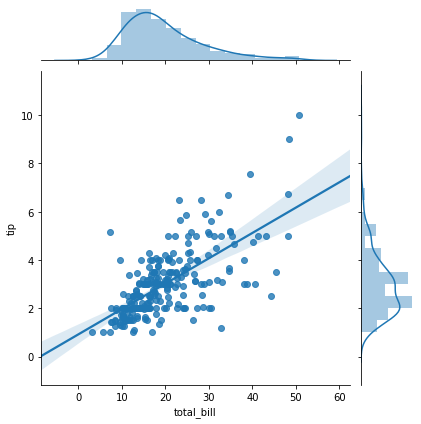

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg');

In [15]:
import statsmodels.api as sm
X = tips['total_bill']         # independent variable
X = sm.add_constant(X)         # bias term
y = tips['tip']                # dependent variable
model_slr = sm.OLS(y,X).fit()  # initialize the model and fit

/home/bgibson/anaconda3/envs/eods-s20/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
model_slr.params

const         0.920270
total_bill    0.105025
dtype: float64

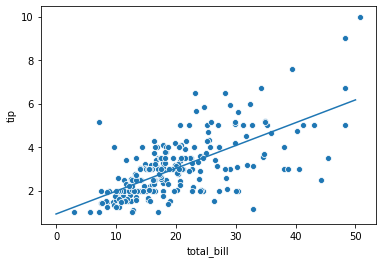

In [17]:
y_hat = model_slr.predict(np.array([[1,0],[1,50]]))
ax = sns.scatterplot(tips.total_bill,tips.tip);
ax.plot([0,50],y_hat)

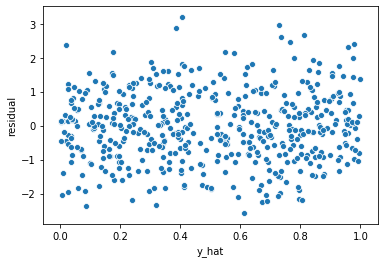

In [18]:
x_obs = np.random.rand(500)                              # our observed x values
y_obs = 1*x_obs + 0 + np.random.normal(0,1.0,size=(500)) # observed y, with error
y_hat = 1*x_obs + 0                                      # a very good guess
resid_ = y_obs - y_hat                                   # residuals
ax = sns.scatterplot(y_hat,resid_);
ax.set_xlabel('y_hat'); ax.set_ylabel('residual');

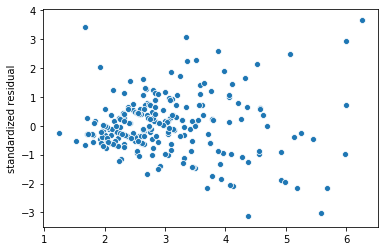

In [19]:
ax = sns.scatterplot(model_slr.predict(),model_slr.resid/np.std(model_slr.resid))
ax.set_ylabel('standardized residual');

In [20]:
model_slr.rsquared # 0.457

0.45661658635167657

In [21]:
X = tips[['total_bill','size']]
X = sm.add_constant(X)
y = tips['tip']
model_mlr = sm.OLS(y,X).fit()

/home/bgibson/anaconda3/envs/eods-s20/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [22]:
model_mlr.params

const         0.668945
total_bill    0.092713
size          0.192598
dtype: float64

In [23]:
model_mlr.rsquared, model_mlr.rsquared_adj

(0.46786930879612576, 0.4634532864624836)

In [24]:
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           9.67e-34
Time:                        15:47:40   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
def map_tips(x):
    return True if x > tips.tip.median() else False
tips['tip_high'] = tips.tip.apply(map_tips)

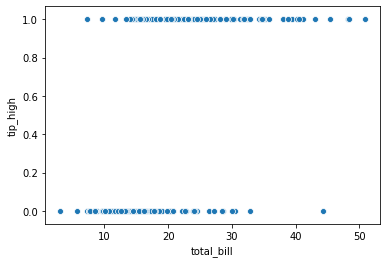

In [26]:
sns.scatterplot(tips.total_bill,tips.tip_high);

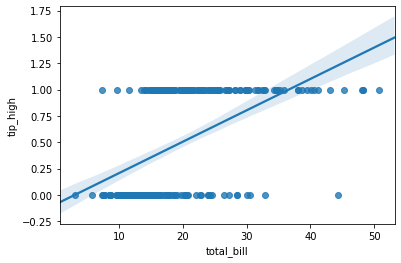

In [27]:
sns.regplot(tips.total_bill,tips.tip_high);

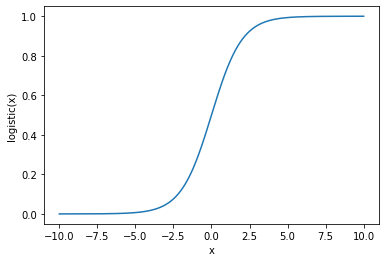

In [28]:
def logistic(x):
    return 1 / (1+np.exp(-x))
x = np.linspace(-10,10,1000)
plt.plot(x,logistic(x));
plt.xlabel('x');plt.ylabel('logistic(x)');

In [29]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(fit_intercept=True)
logr.fit(tips.total_bill.values.reshape(-1,1),tips.tip_high)
print(f'alpha = {logr.intercept_[0]:0.2f}')
print(f'beta_1 = {logr.coef_[0][0]:0.2f}')

alpha = -3.69
beta_1 = 0.20


In [30]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(fit_intercept=True)
logr.fit(tips[['total_bill','size']],tips.tip_high)
print(f'alpha = {logr.intercept_[0]:0.2f}')
for i,beta in enumerate(logr.coef_[0]):
    print(f'beta_{i+1} = {beta:0.2f}')

alpha = -3.96
beta_1 = 0.18
beta_2 = 0.22


In [31]:
logr.penalty

'l2'

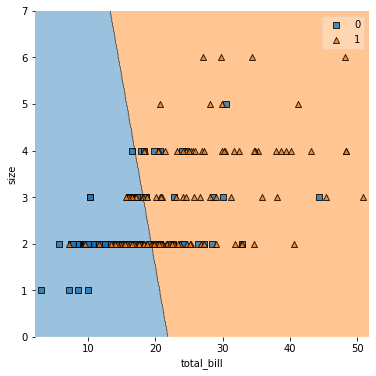

In [32]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(tips[['total_bill','size']].values, tips.tip_high.astype(int).values, clf=logr);
plt.xlabel('total_bill'); plt.ylabel('size');

In [33]:
from sklearn import datasets
wine = datasets.load_wine()
X = pd.DataFrame(wine.data,columns=wine.feature_names)
y = wine.target

# keep only class 0 and 1 and two columns of X and standardize X
features = wine.feature_names[3:5]
X = X.iloc[y < 2,3:5].apply(lambda x: (x-x.mean())/x.std()).values
y = y[y < 2]
X.shape,y.shape

((130, 2), (130,))

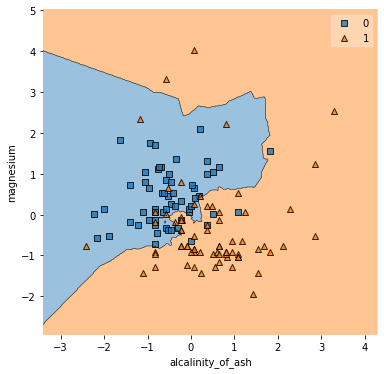

In [34]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=knn);
plt.xlabel(features[0]); plt.ylabel(features[1]);

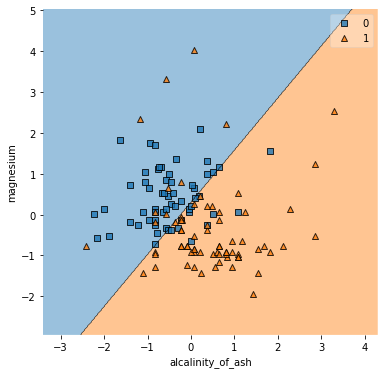

In [35]:
logr = LogisticRegression().fit(X,y)
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=logr);
ax.set_xlabel(features[0]); ax.set_ylabel(features[1]);


#plt.savefig(IMAGEPATH+'wine_2class_logr.png')

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

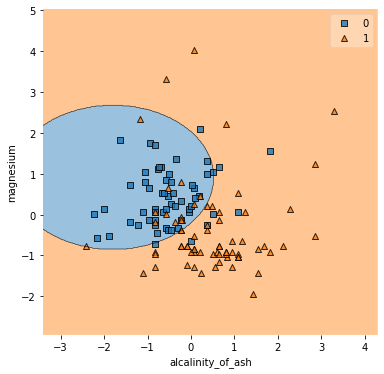

In [37]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=gnb);
plt.xlabel(features[0]); plt.ylabel(features[1]);

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

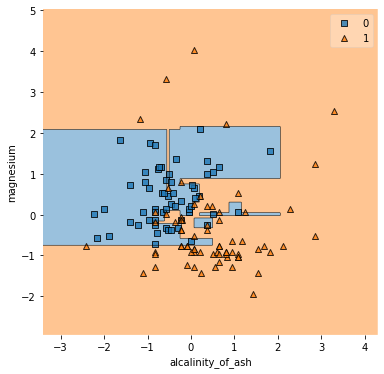

In [39]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=dtc);
plt.xlabel(features[0]); plt.ylabel(features[1]);

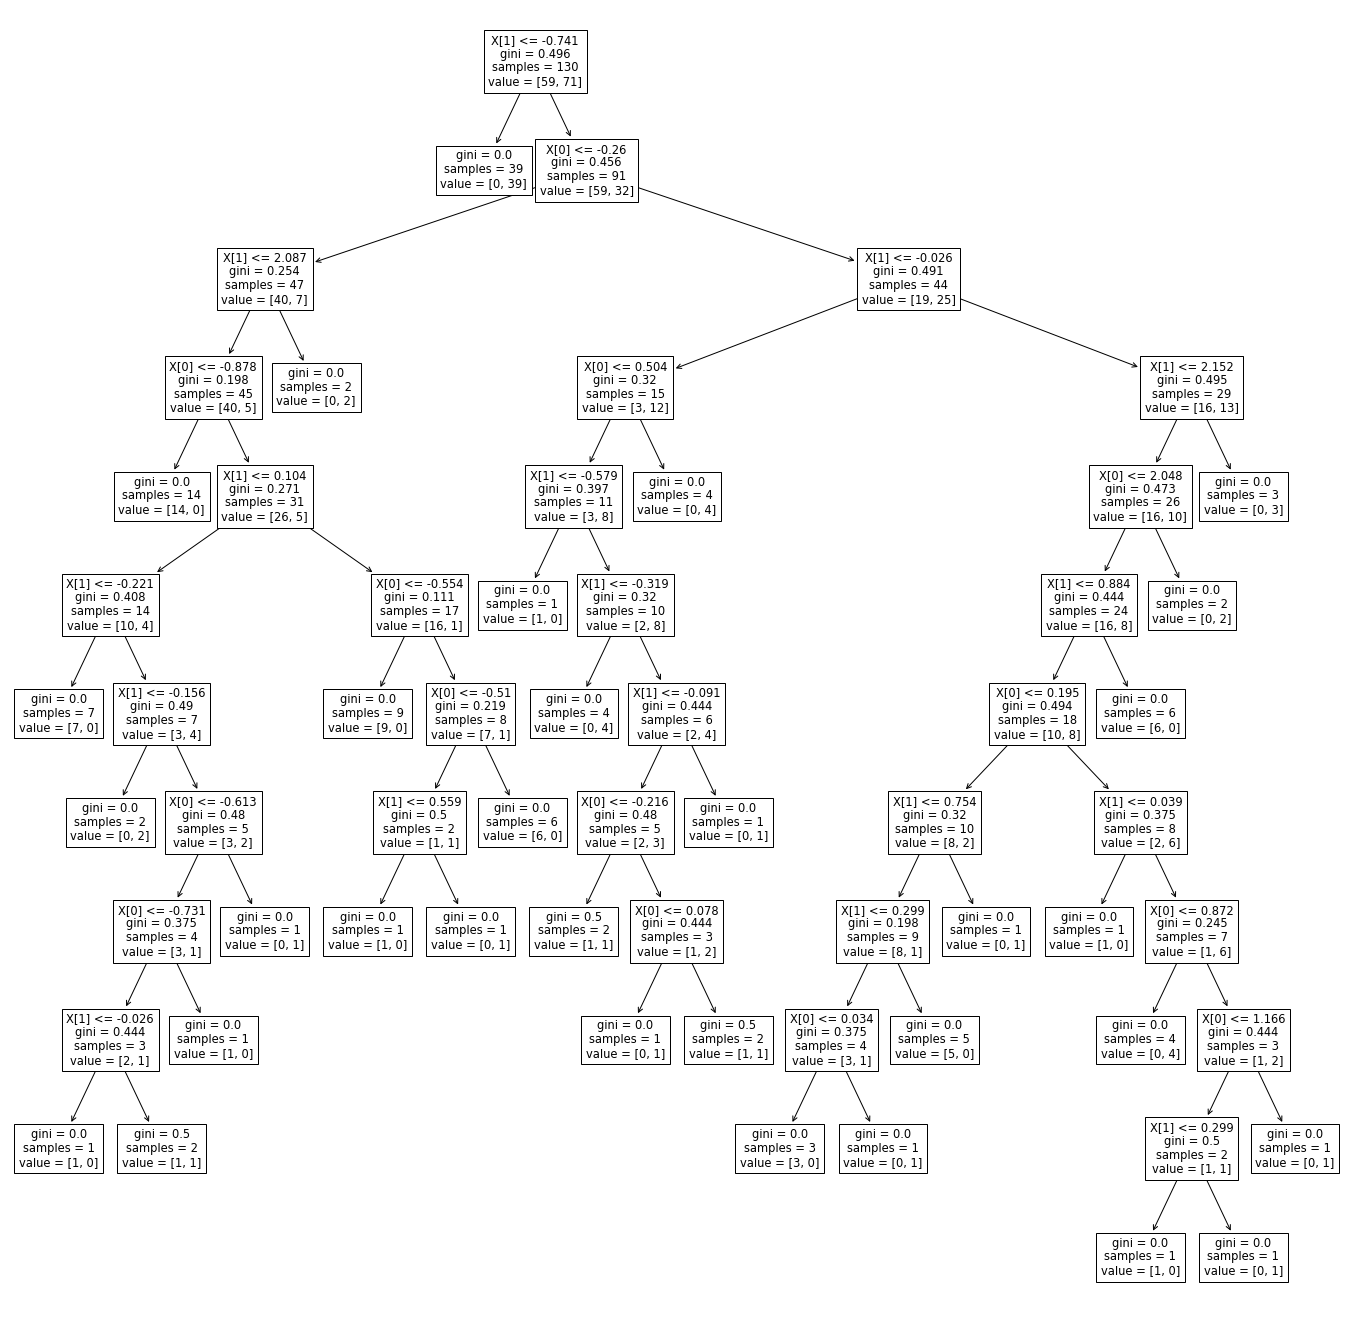

In [40]:
from sklearn.tree import plot_tree
fig,ax=plt.subplots(1,1,figsize=(24,24))
plot_tree(dtc);

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

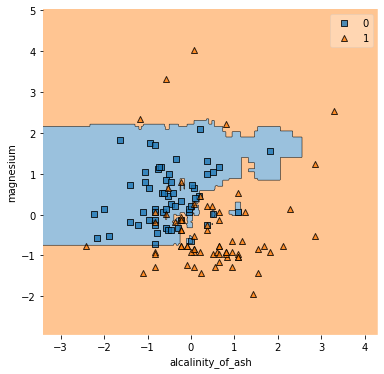

In [42]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=rfc);
plt.xlabel(features[0]); plt.ylabel(features[1]);

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

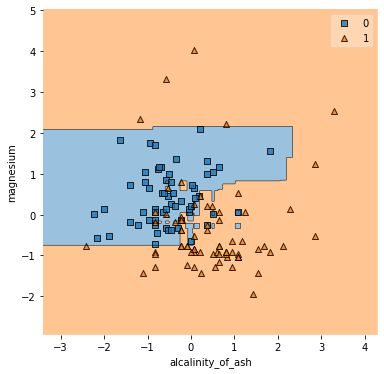

In [44]:
x = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=gbc);
plt.xlabel(features[0]); plt.ylabel(features[1]);

In [45]:
from mlxtend.classifier import StackingClassifier
ensemble = [LogisticRegression(),GaussianNB(),KNeighborsClassifier()]
stc = StackingClassifier(ensemble,LogisticRegression())
stc.fit(X,y)

StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                GaussianNB(priors=None, var_smoothing=1e-09),
                                KNeighborsClassif...
                   meta_classifier=

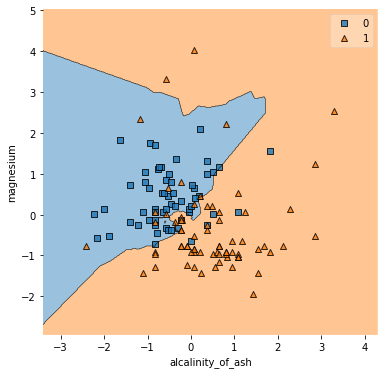

In [46]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X, y, clf=stc);
plt.xlabel(features[0]); plt.ylabel(features[1]);

In [47]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate,train_test_split

In [48]:
X.shape

(130, 2)

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1)

In [50]:
models = {'dummy':DummyClassifier(),
          'logr':LogisticRegression(),
          'gnb':GaussianNB(),
          'dtc':DecisionTreeClassifier(),
          'rfc':RandomForestClassifier(),
          'gbc':GradientBoostingClassifier(),
         }
for model_name,model in models.items():
    scores = cross_validate(model,X_train,y_train, scoring=['accuracy','f1','roc_auc'],cv=3)
    models[model_name] = model.fit(X_train,y_train)
    print(f"model:{model_name:7s} mean_acc:{scores['test_accuracy'].mean():0.3f}  mean_f1:{scores['test_f1'].mean():0.2f}  mean_roc_auc:{scores['test_roc_auc'].mean():0.2f}")

/home/bgibson/anaconda3/envs/eods-s20/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/bgibson/anaconda3/envs/eods-s20/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/bgibson/anaconda3/envs/eods-s20/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/bgibson/anaconda3/envs/eods-s20/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


model:dummy   mean_acc:0.496  mean_f1:0.56  mean_roc_auc:0.56
model:logr    mean_acc:0.838  mean_f1:0.85  mean_roc_auc:0.91
model:gnb     mean_acc:0.863  mean_f1:0.87  mean_roc_auc:0.92
model:dtc     mean_acc:0.769  mean_f1:0.80  mean_roc_auc:0.76
model:rfc     mean_acc:0.803  mean_f1:0.82  mean_roc_auc:0.88
model:gbc     mean_acc:0.769  mean_f1:0.80  mean_roc_auc:0.87


In [51]:
for model_name,model in models.items():
    print(f"model:{model_name:7s} test_set_acc:{model.score(X_test,y_test):0.2f}")

model:dummy   test_set_acc:0.46
model:logr    test_set_acc:0.54
model:gnb     test_set_acc:0.46
model:dtc     test_set_acc:0.62
model:rfc     test_set_acc:0.54
model:gbc     test_set_acc:0.69


In [52]:
from sklearn.metrics import roc_curve

tmp = roc_curve(y_test, DummyClassifier(strategy='most_frequent').fit(X_train,y_train).predict_proba(X_test)[:,1])
tmp

(array([0., 1.]), array([0., 1.]), array([2., 1.]))

In [53]:
sorted(list(zip(y_test,DummyClassifier(strategy='most_frequent').fit(X_train,y_train).predict_proba(X_test)[:,1])),key=lambda x: x[1])

[(0, 1.0),
 (0, 1.0),
 (1, 1.0),
 (0, 1.0),
 (1, 1.0),
 (0, 1.0),
 (0, 1.0),
 (0, 1.0),
 (1, 1.0),
 (1, 1.0),
 (0, 1.0),
 (1, 1.0),
 (0, 1.0)]

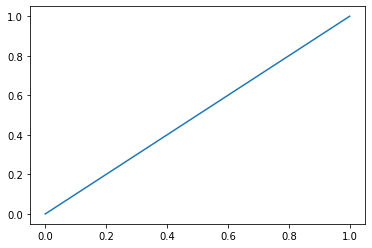

In [54]:
plt.plot(tmp[0],tmp[1])

In [55]:
type(tips)

pandas.core.frame.DataFrame

In [56]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
tip_high      244 non-null bool
dtypes: bool(1), category(4), float64(2), int64(1)
memory usage: 7.5 KB


In [57]:
tips.shape

(244, 8)